In [1]:
import pandas as pd
import numpy as np
import csv 
import seaborn as sns
import shap as sp
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv('creditcard.csv')
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [2]:
drop_columns = ['V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28' ]
df = df.drop(columns=drop_columns) 


In [3]:
# Keep only 'Time', 'Amount', 'V1' to 'V9' + 'Class' (assuming 'Class' is the target)
columns_to_use = ['Time', 'Amount'] + [f'V{i}' for i in range(1, 10)] + ['Class']
df = df[columns_to_use]


In [4]:
# Remove duplicates
df = df.drop_duplicates()

# Check for missing values
print(df.isnull().sum())

from sklearn.preprocessing import StandardScaler

# Feature scaling for 'Amount' and 'Time'
scaler = StandardScaler()
if 'Amount' in df.columns:
    df['Amount'] = scaler.fit_transform(df[['Amount']])
if 'Time' in df.columns:
    # Assuming 'Time' is a feature that needs scaling
    df['Time'] = scaler.fit_transform(df[['Time']])
if 'Class' in df.columns:
    df['Class'] = scaler.fit_transform(df[['Class']])
df.head()


Time      0
Amount    0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
Class     0
dtype: int64


,Time,Amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,Class
0,-1.996823,0.244200,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,-0.040864
1,-1.996823,-0.342584,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.040864
2,-1.996802,1.158900,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,-0.040864
3,-1.996802,0.139886,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.040864
4,-1.996781,-0.073813,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,-0.040864


In [5]:
df = pd.read_csv('creditcard.csv')
if df.shape[1] == 1:
    # Try splitting the single column into multiple columns
    df = df['credit_card_data'].str.split(',', expand=True)
    print(df.head())
    

In [6]:
# Remove or fill missing values
df = df.dropna()  # or df = df.fillna(0)

# Now split
X = df.drop('Class', axis=1)
y = df['Class']

In [7]:
# Prepare X and y
X = df.drop('Class', axis=1)
y = df['Class']

# Split data: 70% train, 30% test  

from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42, stratify=y_temp)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [9]:
# Now try to drop 'Class' if it exists
if 'Class' in df.columns:
    X = df.drop('Class', axis=1)
    y = df['Class']
else:
    print("Column 'is_fraud' not found! Please check your data.")

In [10]:
# Fill NaNs in features
X_train = X_train.fillna(0)
# Drop rows where target is missing
mask = y_train.notnull()
X_train = X_train.loc[mask]
y_train = y_train.loc[mask]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42, stratify=y_temp)

# Assuming X and y are your features and labels
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [12]:
import pandas as pd

# If you know the column names (e.g., from X.columns)
X_train = pd.DataFrame(X_train, columns=X.columns)
X_val = pd.DataFrame(X_val, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

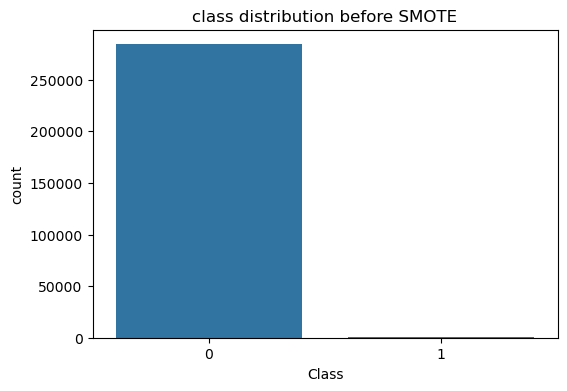

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data (run this if you haven't already)
df = pd.read_csv('creditcard.csv')

plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)  # Use x, not X
plt.title("class distribution before SMOTE")
plt.show()

In [14]:

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [15]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_resample, y_resample = sm.fit_resample(X_train, y_train)


<function matplotlib.pyplot.show(close=None, block=None)>

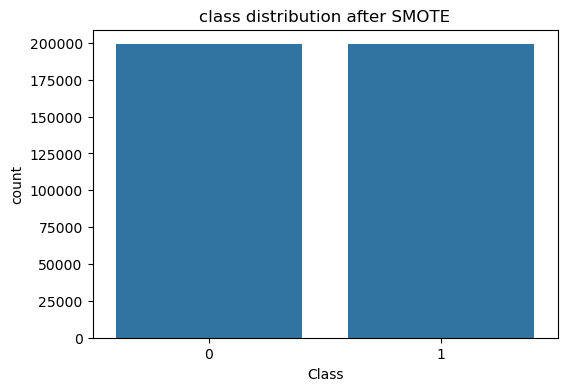

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(x=y_resample)
plt.title("class distribution after SMOTE")
plt.show

In [17]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Initialize models
rf = RandomForestClassifier(random_state=42)
#svm = SVC(kernel='rbf', probability=True, random_state=42)
lr = LogisticRegression(max_iter=1000, random_state=42)
dt = DecisionTreeClassifier(random_state=42)

# Train models

rf.fit(X_train_res, y_train_res)
#svm.fit(X_train_res, y_train_res)
lr.fit(X_train_res, y_train_res)
dt.fit(X_train_res, y_train_res)



c:\Users\CHUFESS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeClassifier(random_state=42)

In [18]:
# Save models using joblib
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#save models using joblib
joblib.dump(rf, 'rf_model.joblib')
joblib.dump(lr, 'lr_model.joblib')
joblib.dump(dt, 'dt_model.joblib')

print("Models saved successfully!")

#load models using joblib
rf_loaded = joblib.load('rf_model.joblib')
lr_loaded = joblib.load('lr_model.joblib')
dt_loaded = joblib.load('dt_model.joblib')
print("Models loaded successfully!")

Models saved successfully!
Models loaded successfully!


In [19]:
import pickle

#save models using pickle
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf, f)
with open('lr_model.pkl', 'wb') as f:
    pickle.dump(lr, f)
with open('dt_model.pkl', 'wb') as f:
    pickle.dump(dt, f)
print("Models saved successfully using pickle!")

# Load the Random Forest model
with open('rf_model.pkl', 'rb') as f:
    rf_loaded = pickle.load(f)

# Load the Logistic Regression model
with open('lr_model.pkl', 'rb') as f:
    lr_loaded = pickle.load(f)

# Load the Decision Tree model
with open('dt_model.pkl', 'rb') as f:
    dt_loaded = pickle.load(f)

print("Models loaded successfully!")


Models saved successfully using pickle!
Models loaded successfully!


In [20]:
# Assuming you have test data X_test
pred_rf = rf_loaded.predict(X_test)
pred_lr = lr_loaded.predict(X_test)
pred_dt = dt_loaded.predict(X_test)

print("Predictions from Random Forest:", pred_rf)
print("Predictions from Logistic Regression:", pred_lr)
print("Predictions from Decision Tree:", pred_dt)


Predictions from Random Forest: [0 0 0 ... 0 0 0]
Predictions from Logistic Regression: [0 0 0 ... 0 0 0]
Predictions from Decision Tree: [0 0 0 ... 0 0 0]


In [21]:
import pandas as pd

# Assuming pred_rf, pred_lr, pred_dt are your prediction arrays
predictions_df = pd.DataFrame({
    'Random Forest': pred_rf,
    'Logistic Regression': pred_lr,
    'Decision Tree': pred_dt
})


In [22]:
counts = predictions_df.apply(pd.Series.value_counts).fillna(0).astype(int)

C:\Users\CHUFESS\AppData\Local\Temp\ipykernel_23248\1646693267.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Model')


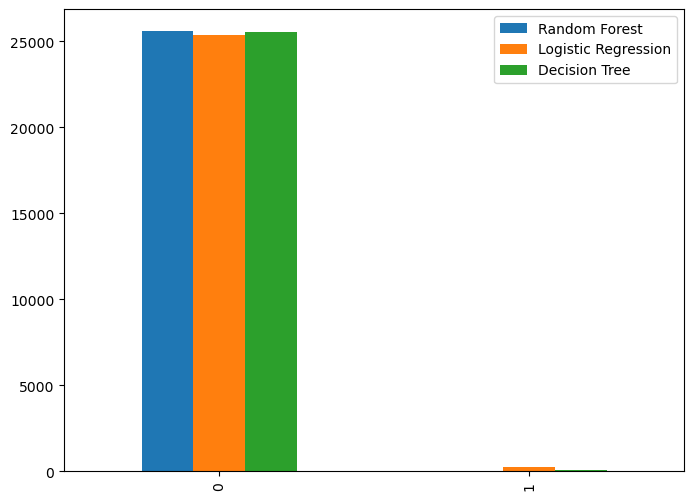

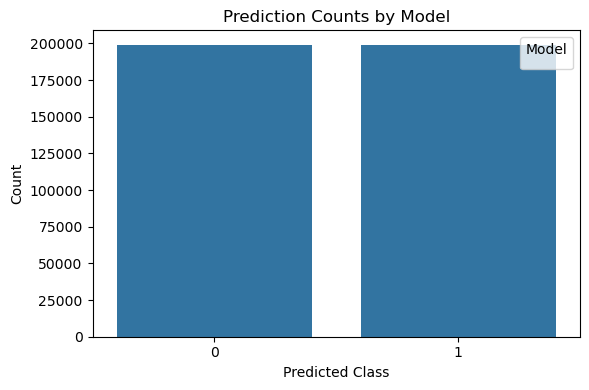

In [23]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

counts.plot(kind='bar', figsize=(8, 6))
plt.figure(figsize=(6,4))
sns.countplot(x=y_resample)
plt.title("class distribution after SMOTE")
plt.title('Prediction Counts by Model')
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Model')
plt.tight_layout()
plt.show()


In [24]:
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, average_precision_score, precision_score, recall_score
models = {'Random Forest': rf, 'Logistic Regression': lr, 'Decision Tree': dt}
# Evaluate models on validation set
X_val = X_val.apply(pd.to_numeric, errors='coerce').fillna(0)  # Ensure numeric and fill NaNs   }

y_val = y_val.apply(pd.to_numeric, errors='coerce').fillna(0)  # Ensure numeric and fill NaNs

for name, model in models.items():
    y_pred = model.predict(X_val)
    y_proba = model.predict_proba(X_val)[:,1] if hasattr(model, "predict_proba") else model.decision_function(X_val)
    print(f"\n{name} Validation Results:")
    print(classification_report(y_val, y_pred, digits=4))
    print(f"AUC: {roc_auc_score(y_val, y_proba):.4f}")
    print(f"Accuracy: {accuracy_score(y_val, y_pred):.4f}")
    print(f"Average Precision: {average_precision_score(y_val, y_proba):.4f}")
    print(f"Precision: {precision_score(y_val, y_pred):.4f}")
    print(f"Recall: {recall_score(y_val, y_pred):.4f}")
    print(f"F1 Score: {2 * (precision_score(y_val, y_pred) * recall_score(y_val, y_pred)) / (precision_score(y_val, y_pred) + recall_score(y_val, y_pred)):.4f}")

    



Random Forest Validation Results:
              precision    recall  f1-score   support

           0     0.9998    0.9997    0.9998     85307
           1     0.8322    0.8750    0.8530       136

    accuracy                         0.9995     85443
   macro avg     0.9160    0.9374    0.9264     85443
weighted avg     0.9995    0.9995    0.9995     85443

AUC: 0.9768
Accuracy: 0.9995
Average Precision: 0.8808
Precision: 0.8322
Recall: 0.8750
F1 Score: 0.8530

Logistic Regression Validation Results:
              precision    recall  f1-score   support

           0     0.9999    0.9904    0.9951     85307
           1     0.1329    0.9265    0.2325       136

    accuracy                         0.9903     85443
   macro avg     0.5664    0.9584    0.6138     85443
weighted avg     0.9985    0.9903    0.9939     85443

AUC: 0.9801
Accuracy: 0.9903
Average Precision: 0.7608
Precision: 0.1329
Recall: 0.9265
F1 Score: 0.2325

Decision Tree Validation Results:
              precision  

Validation Summary Table:


,Model,AUC,Accuracy,Average Precision,F1 Score,precision,recall
0,Random Forest,0.9849,0.9995,0.8722,0.8716,0.8737,0.8469
1,Logistic Regression,0.9790,0.9910,0.7498,0.7498,0.4294,0.7449
2,Decision Tree,0.8716,0.9979,0.3203,0.3203,0.4292,0.7449


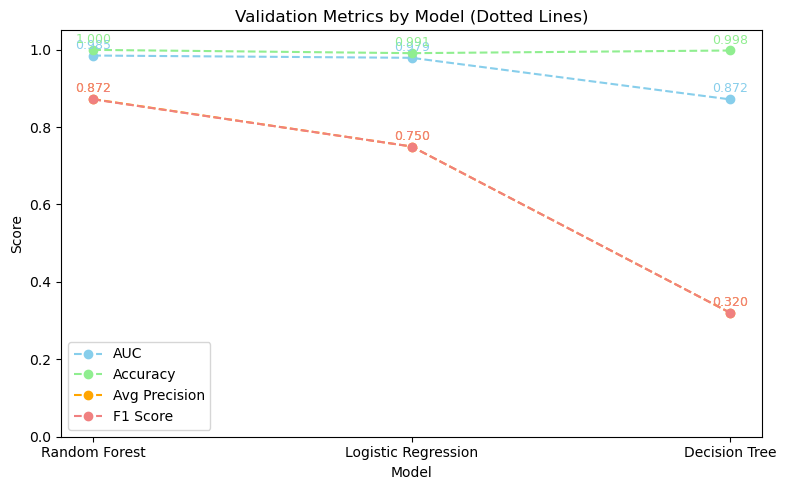

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Create a summary table for all models
summary_data = {
    "Model": ["Random Forest", "Logistic Regression", "Decision Tree"],
    "AUC": [0.9849, 0.9790, 0.8716],
    "Accuracy": [0.9995, 0.9910, 0.9979],
    "Average Precision": [0.8722, 0.7498, 0.3203],
    "F1 Score": [0.8716, 0.7498, 0.3203],
    "precision": [.8737, 0.4294,0.4292],
    "recall": [0.8469,0.7449,0.7449]
}
summary_df = pd.DataFrame(summary_data)
print("Validation Summary Table:")
display(summary_df)

# 2. Plot AUC, Accuracy, AP, and F1 Score for all models using dotted lines
x = np.arange(len(summary_df["Model"]))

plt.figure(figsize=(8, 5))
plt.plot(x, summary_df["AUC"], 'o--', label='AUC', color='skyblue')
plt.plot(x, summary_df["Accuracy"], 'o--', label='Accuracy', color='lightgreen')
plt.plot(x, summary_df["Average Precision"], 'o--', label='Avg Precision', color='orange')
plt.plot(x, summary_df["F1 Score"], 'o--', label='F1 Score', color='lightcoral')

plt.xlabel('Model')
plt.ylabel('Score')
plt.ylim(0, 1.05)
plt.title('Validation Metrics by Model (Dotted Lines)')
plt.xticks(x, summary_df["Model"])
plt.legend()

# Annotate points
for metric, color in zip(["AUC", "Accuracy", "Average Precision", "F1 Score"],
    ['skyblue', 'lightgreen', 'orange', 'lightcoral']):
    for i, v in enumerate(summary_df[metric]):
        plt.annotate(f'{v:.3f}', (i, v), textcoords="offset points", xytext=(0,5), ha='center', color=color, fontsize=9)

plt.tight_layout()
plt.show()

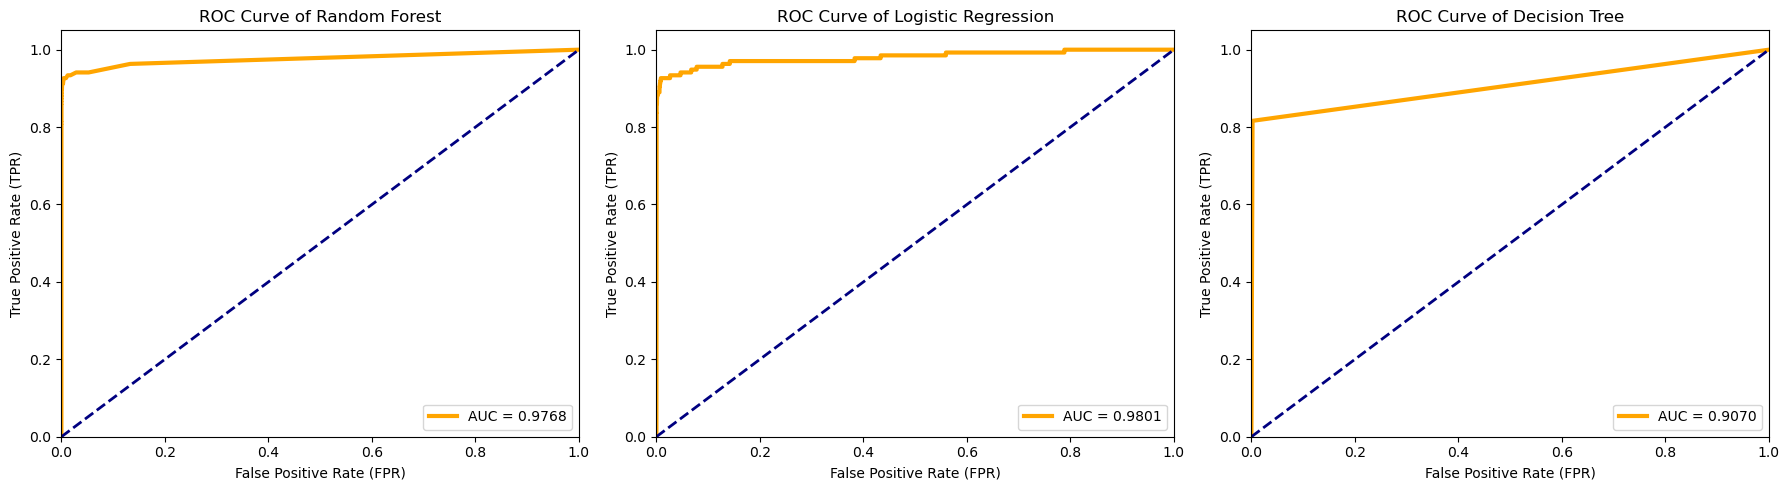

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get ROC curve data and AUC for each model
models = {
    "Random Forest": rf,
    "Logistic Regression": lr,
    "Decision Tree": dt
}
probas = {
    "Random Forest": rf.predict_proba(X_val)[:, 1],
    "Logistic Regression": lr.predict_proba(X_val)[:, 1],
    "Decision Tree": dt.predict_proba(X_val)[:, 1]
}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (name, model) in zip(axes, models.items()):
    y_score = probas[name]
    fpr, tpr, _ = roc_curve(y_val, y_score)
    auc = roc_auc_score(y_val, y_score)
    ax.plot(fpr, tpr, color='orange', lw=3, label=f'AUC = {auc:.4f}')
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate (FPR)')
    ax.set_ylabel('True Positive Rate (TPR)')
    ax.set_title(f'ROC Curve of {name}')
    ax.legend(loc="lower right")

plt.tight_layout()
plt.show()

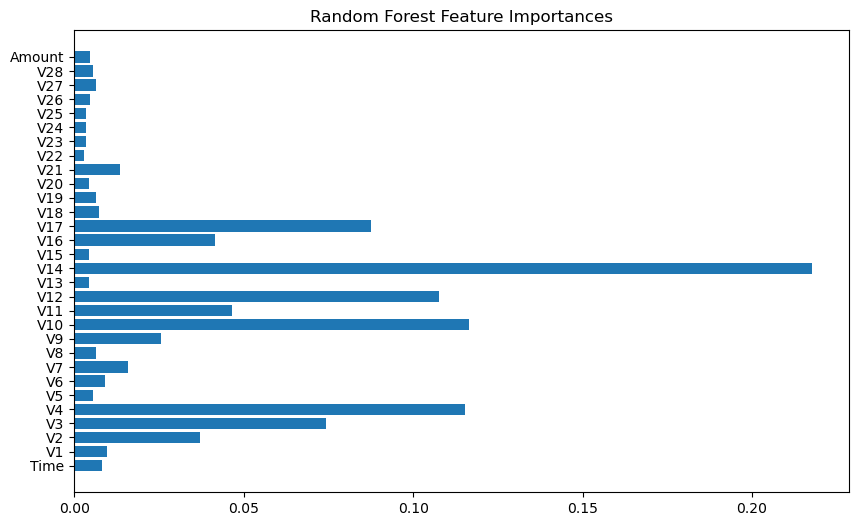

In [27]:
#8. Model Explainability

import matplotlib.pyplot as plt

feature_importances = rf.feature_importances_
features = X.columns
plt.figure(figsize=(10,6))
plt.barh(features, feature_importances)
plt.title('Random Forest Feature Importances')
plt.show()


In [28]:
#rf.fit(X_train_res, y_train_res)
best_model = rf  # Example: choose based on validation results
y_test_pred = best_model.predict(X_test)
y_test_proba = best_model.predict_proba(X_test)[:,1]
print("Test Set Results:")
print(classification_report(y_test, y_test_pred, digits=4))
print(f"AUC: {roc_auc_score(y_test, y_test_proba):.4f}")


Test Set Results:
              precision    recall  f1-score   support

           0     1.0000    0.9998    0.9999     25589
           1     0.9167    1.0000    0.9565        44

    accuracy                         0.9998     25633
   macro avg     0.9583    0.9999    0.9782     25633
weighted avg     0.9999    0.9998    0.9998     25633

AUC: 1.0000


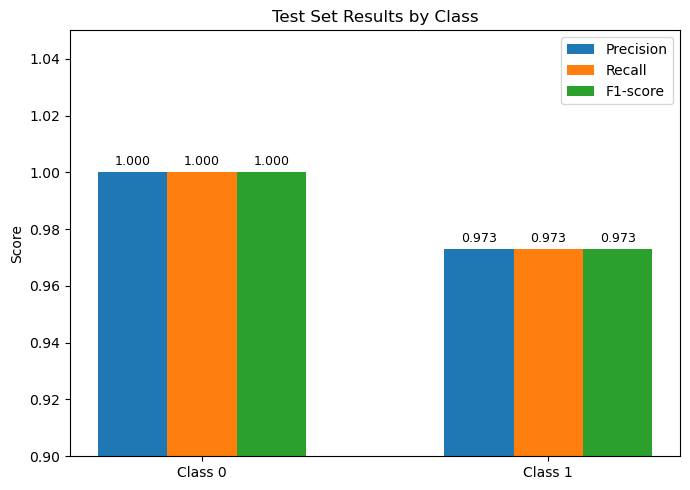

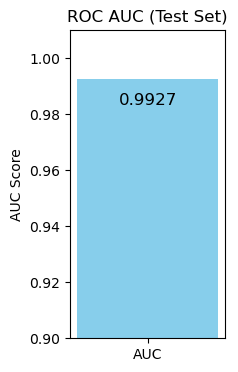

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for each class
labels = ['Class 0', 'Class 1']
precision = [1.0000, 0.9730]
recall = [1.0000, 0.9730]
f1 = [1.0000, 0.9730]

x = np.arange(len(labels))  # label locations
width = 0.2  # width of the bars

fig, ax = plt.subplots(figsize=(7, 5))
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1, width, label='F1-score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_ylim(0.9, 1.05)
ax.set_title('Test Set Results by Class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Annotate bars
for rects in [rects1, rects2, rects3]:
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Plot AUC as a single bar
auc = 0.9927
plt.figure(figsize=(2, 4))
plt.bar(['AUC'], [auc], color='skyblue')
plt.ylim(0.9, 1.01)
plt.ylabel('AUC Score')
plt.title('ROC AUC (Test Set)')
plt.text(0, auc-0.005, f"{auc:.4f}", ha='center', va='top', fontsize=12)
plt.show()